# 📊 Task 2 - Exploratory Data Analysis (EDA)
This notebook analyzes PowerCo's client and pricing data to explore patterns related to customer churn and pricing sensitivity.

## 1. Importing Required Libraries
We begin by importing the necessary libraries for data analysis and visualization.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Loading the Data
We load the client and pricing datasets provided by PowerCo.

In [8]:
client_df = pd.read_csv(r"C:\Users\VarunAakash\Downloads\data science tasks\client_data (1).csv")
price_df = pd.read_csv(r"C:\Users\VarunAakash\Downloads\data science tasks\price_data (1).csv")

## 3. Previewing the Data
Let's view the first few rows of each dataset to understand the structure.


In [9]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [10]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## 4. Data Types and Missing Values
Inspect data types and check for missing values in both datasets.

In [11]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [12]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [13]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [14]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

## 5. Descriptive Statistics
Review basic statistics like mean, median, min, max, and standard deviation for numerical features.

In [15]:
client_df.describe(include='all')

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
count,14606,14606,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,...,14606,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606,14606.000000,14606.000000
unique,14606,8,NaN,NaN,NaN,1796,368,2129,386,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,NaN,NaN,NaN,2009-08-01,2016-02-01,2015-11-01,2015-06-23,NaN,...,f,NaN,NaN,NaN,NaN,NaN,NaN,lxidpiddsbxsbosboudacockeimpuepw,NaN,NaN
freq,1,6754,NaN,NaN,NaN,95,145,721,587,NaN,...,11955,NaN,NaN,NaN,NaN,NaN,NaN,7097,NaN,NaN
mean,NaN,NaN,1.592203e+05,2.809238e+04,16090.269752,NaN,NaN,NaN,NaN,1868.614880,...,NaN,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,NaN,18.135136,0.097152
std,NaN,NaN,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,...,NaN,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,NaN,13.534743,0.296175
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,3.300000,0.000000
25%,NaN,NaN,5.674750e+03,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,494.995000,...,NaN,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,NaN,12.500000,0.000000
50%,NaN,NaN,1.411550e+04,0.000000e+00,792.500000,NaN,NaN,NaN,NaN,1112.875000,...,NaN,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,NaN,13.856000,0.000000
75%,NaN,NaN,4.076375e+04,0.000000e+00,3383.000000,NaN,NaN,NaN,NaN,2401.790000,...,NaN,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,NaN,19.172500,0.000000


In [16]:
price_df.describe(include='all')

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002,193002,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
unique,16096,12,NaN,NaN,NaN,NaN,NaN,NaN
top,038af19179925da21a25619c5a24b745,2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,16094,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,NaN,NaN,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,NaN,NaN,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,NaN,NaN,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389


### 6. 📊 Data Visualization
### a. Distribution of Numerical Columns in Client Data
Visualize the distribution of numeric variables using histograms.

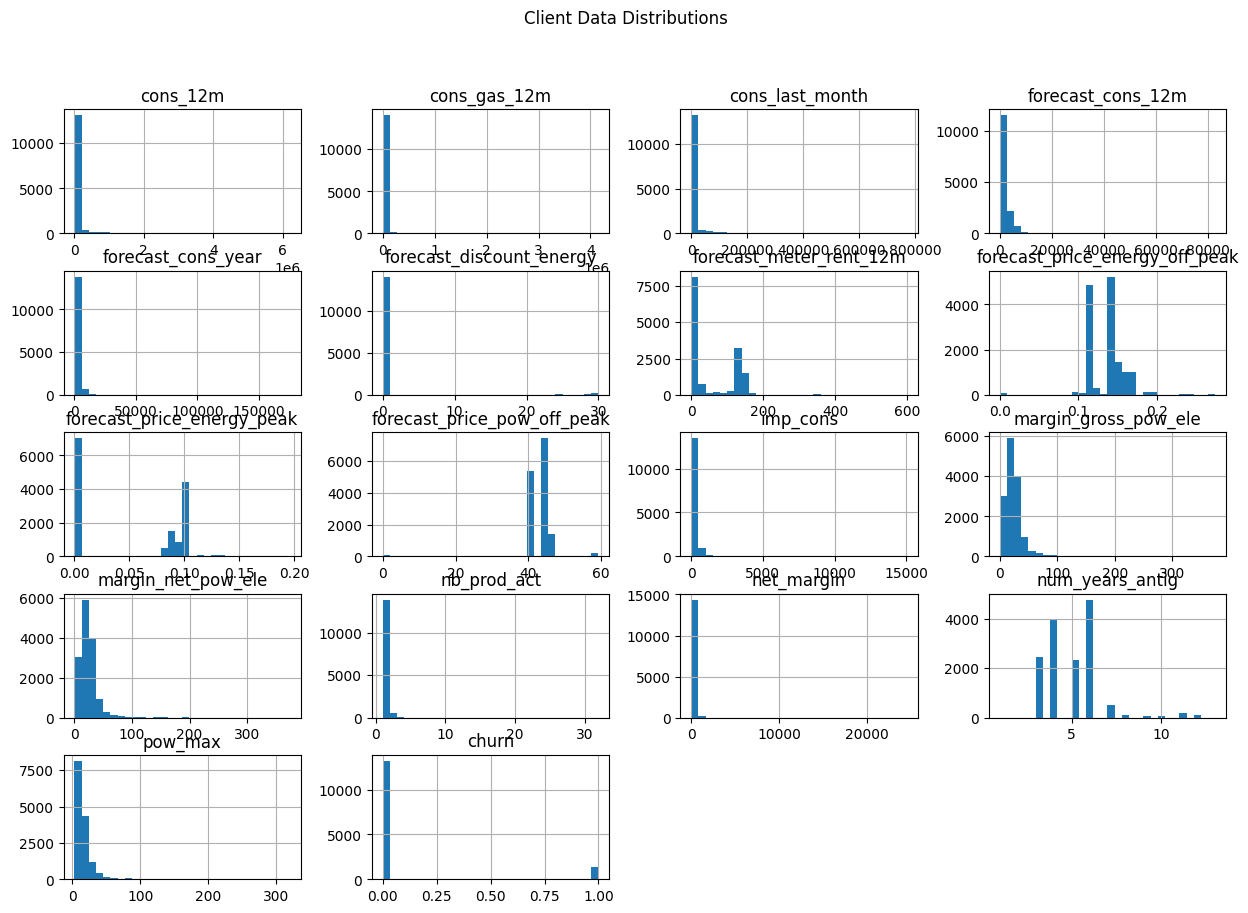

In [17]:
client_df.hist(bins=30, figsize=(15,10))
plt.suptitle('Client Data Distributions')
plt.show()

### b. Boxplot for Forecasted Usage
Check for outliers and spread in forecasted usage.

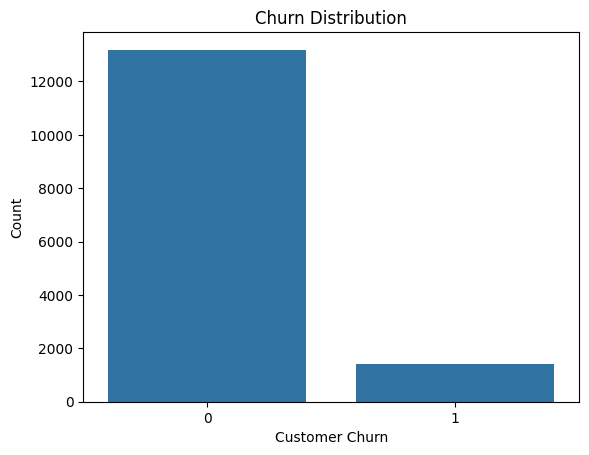

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churn', data=client_df)
plt.title('Churn Distribution')
plt.xlabel('Customer Churn')
plt.ylabel('Count')
plt.show()

### c. Correlation Heatmap
Understand relationships between numerical features.

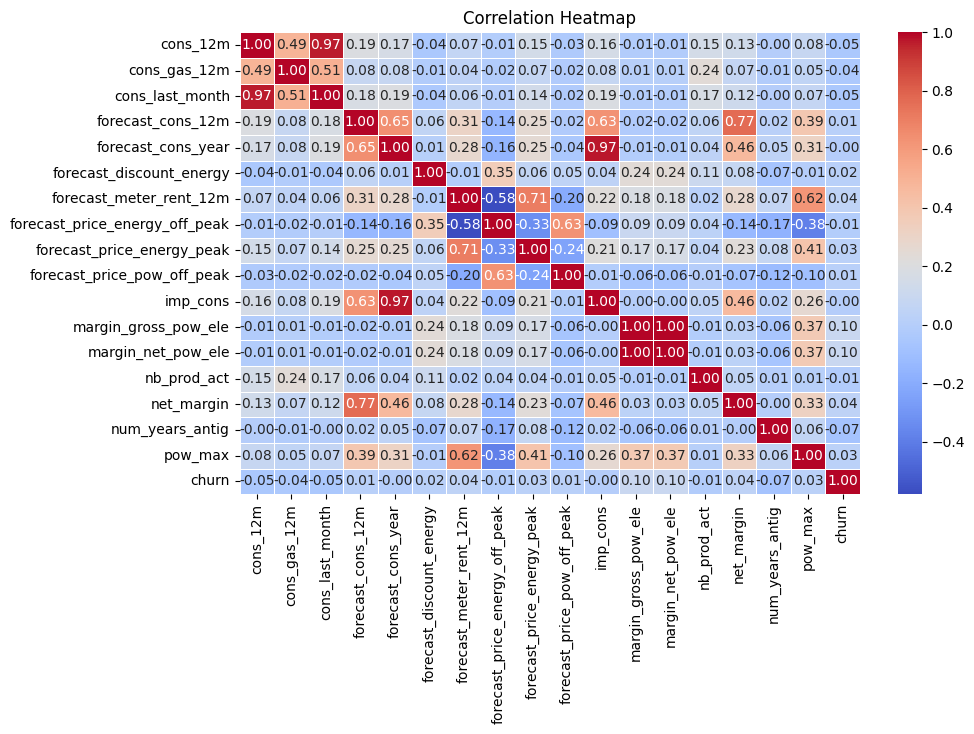

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = client_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()